In [134]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# this allows plots to appear directly in the notebook
%matplotlib inline

In [135]:
# read data into a DataFrame
data = pd.read_csv('car_mpg.csv')
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,model
0,18,8,307,130.0,3504,12.0,70,1,"""chevrolet chevelle malibu"""
1,15,8,350,165.0,3693,11.5,70,1,"""buick skylark 320"""
2,18,8,318,150.0,3436,11.0,70,1,"""plymouth satellite"""
3,16,8,304,150.0,3433,12.0,70,1,"""amc rebel sst"""
4,17,8,302,140.0,3449,10.5,70,1,"""ford torino"""


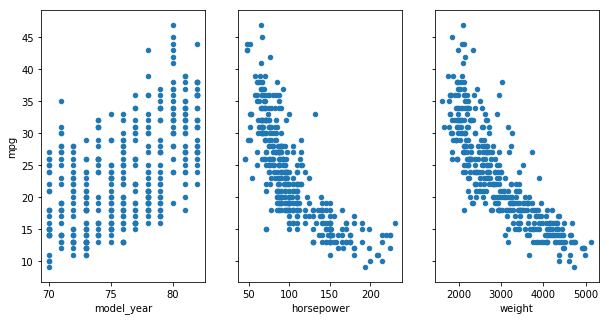

In [176]:
data.shape# visualize the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 3, sharey=True)
data.plot(kind='scatter', x='model_year', y='mpg', ax=axs[0], figsize=(10, 5))
data.plot(kind='scatter', x='horsepower', y='mpg', ax=axs[1])
data.plot(kind='scatter', x='weight', y='mpg', ax=axs[2])



In [193]:
# this is the standard import if you're using "formula notation" (similar to R)
import statsmodels.formula.api as smf

# create a fitted model in one line
lm = smf.ols(formula='mpg ~ model_year', data=data).fit()

# print the coefficients
lm.params

Intercept    -70.259828
model_year     1.233913
dtype: float64

In [194]:
data = data.dropna(how='any') 

In [195]:
# manually calculate the prediction
39.955805 - 0.157591*75

28.13648

In [196]:
# you have to create a DataFrame since the Statsmodels formula interface expects it
X_new = pd.DataFrame({'model_year': [70]})
X_new.head()

,model_year
0,70


In [197]:
# use the model to make predictions on a new value
lm.predict(X_new)

0    16.114053
dtype: float64

In [198]:
# create a DataFrame with the minimum and maximum values of TV
X_new = pd.DataFrame({'model_year': [data.model_year.min(), data.model_year.max()]})
X_new.head()

,model_year
0,70
1,82


In [199]:
# make predictions for those x values and store them
preds = lm.predict(X_new)
preds

0    16.114053
1    30.921004
dtype: float64

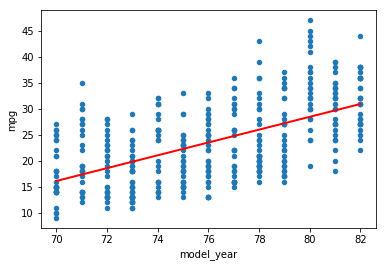

In [200]:
# first, plot the observed data
data.plot(kind='scatter', x='model_year', y='mpg')

# then, plot the least squares line
plt.plot(X_new, preds, c='red', linewidth=2)

In [201]:
# print the confidence intervals for the model coefficients
lm.conf_int()

,0,1
Intercept,-83.290810,-57.228847
model_year,1.062607,1.405218


In [202]:
data.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
mpg,1.000000,-0.776796,-0.804304,-0.777683,-0.831535,0.420997,0.582750,0.563667
cylinders,-0.776796,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.804304,0.950823,1.000000,0.897259,0.932993,-0.543800,-0.369873,-0.614551
horsepower,-0.777683,0.842983,0.897259,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.831535,0.897527,0.932993,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.420997,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
model_year,0.582750,-0.345647,-0.369873,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.563667,-0.568932,-0.614551,-0.455171,-0.585005,0.212746,0.181528,1.000000


In [203]:
# print the p-values for the model coefficients
lm.pvalues

Intercept     3.056966e-23
model_year    5.025139e-37
dtype: float64

In [204]:
# print the R-squared value for the model
lm.rsquared

0.33959803315165937

In [216]:

# create a fitted model with all three features
lm = smf.ols(formula='mpg ~ horsepower + weight + cylinders + model_year', data=data).fit()

# print the coefficients
lm.params

Intercept    -13.995665
horsepower    -0.003208
weight        -0.006282
cylinders     -0.121396
model_year     0.752745
dtype: float64

In [217]:
# print a summary of the fitted model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     409.7
Date:                Fri, 02 Mar 2018   Prob (F-statistic):          1.22e-137
Time:                        22:48:27   Log-Likelihood:                -1036.5
No. Observations:                 392   AIC:                             2083.
Df Residuals:                     387   BIC:                             2103.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -13.9957      4.194     -3.337      0.001     -22.241      -5.750
horsepower    -0.0032      0.010     -0.328      0.743      -0.022       0.016
weight        -0.0063      0.001    -11.983      0.000      -0.007      -0.005
cylinders     -0.1214      0.242     -0.501      0.617      -0.598       0.355
model_year     0.7527      0.052     14.417      0.000       0.650       0.855
==============================================================================
Omnibus:                       42.273   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               71.921
Skew:                           0.665   Prob(JB):                     2.41e-16
Kurtosis:                       4.622   Cond. No.                     7.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [218]:
# only include TV and Radio in the model
lm = smf.ols(formula='mpg ~  cylinders', data=data).fit()
lm.rsquared

0.60341185406399722

In [219]:
# add Newspaper to the model (which we believe has no association with Sales)
lm = smf.ols(formula='mpg ~ cylinders + weight', data=data).fit()
lm.rsquared

0.69622571388788645

In [220]:
# add Newspaper to the model (which we believe has no association with Sales)
lm = smf.ols(formula='mpg ~ horsepower + weight', data=data).fit()
lm.rsquared

0.70513478773376426

In [229]:
# create X and y
feature_cols = ['horsepower','weight', 'cylinders', 'origin', 'model_year']
X = data[feature_cols]
y = data.mpg

# follow the usual sklearn pattern: import, instantiate, fit
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X, y)

# print intercept and coefficients
print(lm.intercept_)
print(lm.coef_)

-17.3744041061
[-0.01063551 -0.00566711  0.0570205   1.18023884  0.74598259]


In [230]:
# pair the feature names with the coefficients
list(zip(feature_cols, lm.coef_))

[('horsepower', -0.010635510686168198),
 ('weight', -0.0056671147828093),
 ('cylinders', 0.057020495528816759),
 ('origin', 1.180238844329895),
 ('model_year', 0.74598258533112682)]

In [231]:
# predict for a new observation


In [232]:
# calculate the R-squared
lm.score(X, y)

0.81831791990284453